In [1]:
import pandas as pd
import os

# Get the current working directory
cwd = os.getcwd()

# Define the relative path to the Excel file
file_path = os.path.join(cwd, 'cleaned_data.xlsx')

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()


,Supplier,Currency,Spend Original Currency,Exchange Rate,Spend GBP,Level 1 Description,Level 2 Description,Location,Business Unit,Company,Region,Date
0,PWC,EUR,163084,0.84,136990.56,Professional Services,Audit,Reno,Head Office,BFC Inc,North America,2017-11-10
1,PWC,EUR,150000,0.89,133500.00,Professional Services,Consultancy,Reno,Head Office,BFC Inc,North America,2018-06-05
2,IBM,GBP,272929,1.00,272929.00,IT,IT Services,Reno,Head Office,BFC Inc,North America,2017-04-02
3,FedEx,USD,165657,0.71,117616.47,Logistics,Freight,Reno,Head Office,BFC Inc,North America,2018-08-23
4,Marriott,USD,290826,0.71,206486.46,Travel & Entertainment,Hotels,Reno,Head Office,BFC Inc,North America,2018-01-14


In [2]:
# Group by 'Level 1 Description' and sum the 'Spend GBP' values
level1_spend = df.groupby('Level 1 Description')['Spend GBP'].sum()

# Find the largest category
largest_category = level1_spend.idxmax()
largest_spend = level1_spend.max()

# Display the results
print(f"The largest category at Level 1 is: {largest_category} with a total spend of: £{largest_spend}")


The largest category at Level 1 is: Travel & Entertainment with a total spend of: £1911409.8


In [3]:
# Group by 'Supplier' and sum the 'Spend GBP' values
supplier_spend = df.groupby('Supplier')['Spend GBP'].sum()

# Find the biggest supplier
biggest_supplier = supplier_spend.idxmax()
biggest_spend = supplier_spend.max()

# Display the results
print(f"The biggest supplier is: {biggest_supplier} with a total spend of: £{biggest_spend}")


The biggest supplier is: IBM with a total spend of: £698482.34


/tmp/ipykernel_49486/3346341375.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spend GBP', y='Supplier', data=supplier_spend, palette='viridis')


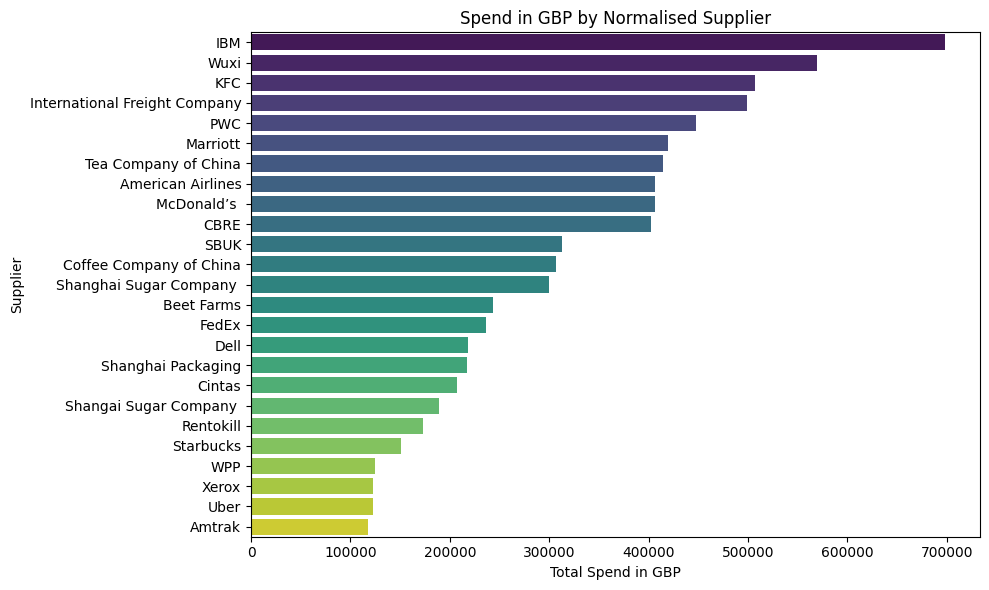

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Supplier' and sum the 'Spend GBP' values
supplier_spend = df.groupby('Supplier')['Spend GBP'].sum().reset_index()

# Sort the suppliers by spend in descending order
supplier_spend = supplier_spend.sort_values(by='Spend GBP', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the barplot using seaborn
sns.barplot(x='Spend GBP', y='Supplier', data=supplier_spend, palette='viridis')

# Add labels and title
plt.xlabel('Total Spend in GBP')
plt.ylabel('Supplier')
plt.title('Spend in GBP by Normalised Supplier')

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
from matplotlib.ticker import FuncFormatter

/tmp/ipykernel_49486/922820975.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spend GBP', y='Level 1 Description', data=level1_spend, palette='viridis')


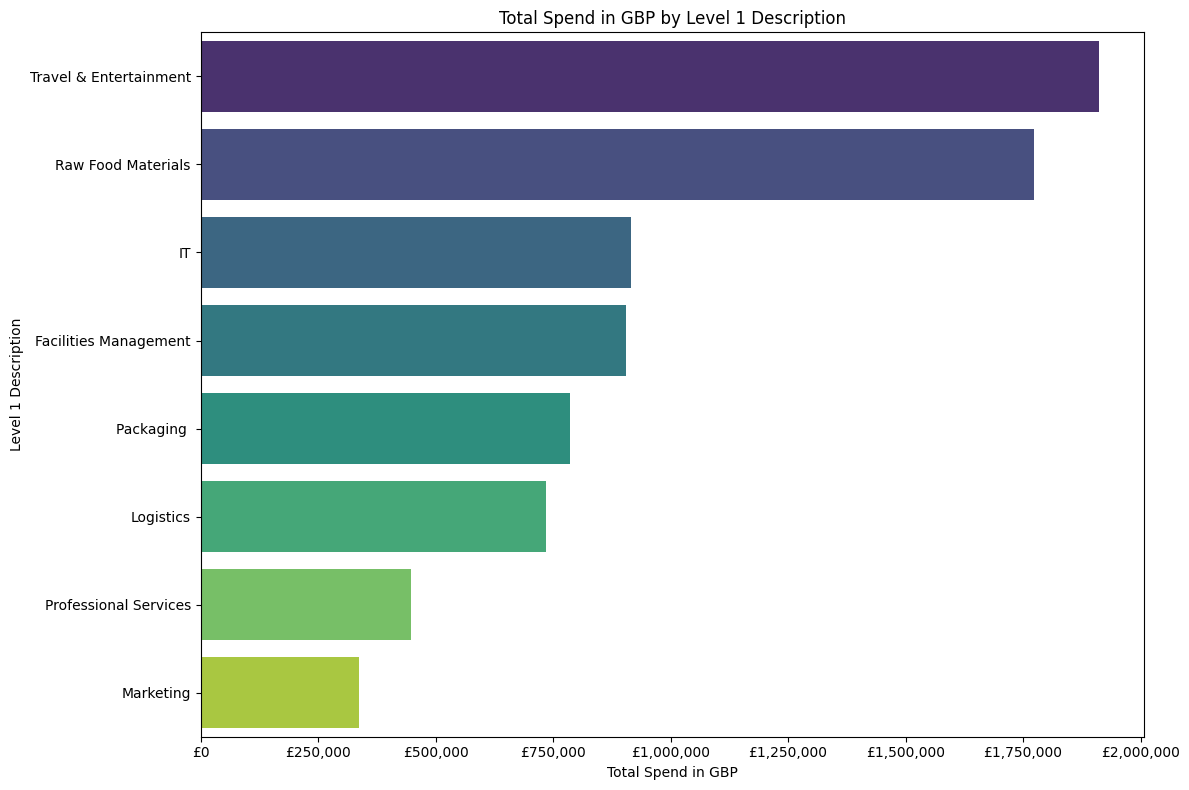

In [10]:
# Group by 'Level 1 Description' and sum the 'Spend GBP' values
level1_spend = df.groupby('Level 1 Description')['Spend GBP'].sum().reset_index()

# Sort the level 1 descriptions by spend in descending order
level1_spend = level1_spend.sort_values(by='Spend GBP', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the barplot using seaborn
sns.barplot(x='Spend GBP', y='Level 1 Description', data=level1_spend, palette='viridis')

# Format the x-axis labels to show in GBP
formatter = FuncFormatter(lambda x, _: f'£{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Total Spend in GBP')
plt.ylabel('Level 1 Description')
plt.title('Total Spend in GBP by Level 1 Description')

# Display the plot
plt.tight_layout()
plt.show()

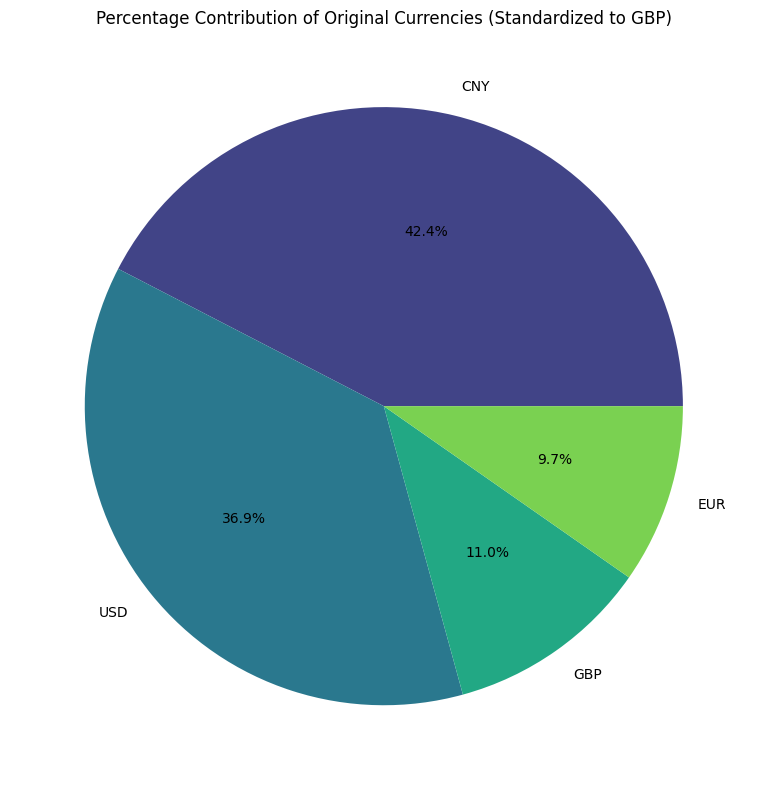

In [12]:
# Group by 'Currency' and sum the 'Spend GBP' values
currency_spend_gbp = df.groupby('Currency')['Spend GBP'].sum().reset_index()

# Calculate the percentage contribution based on 'Spend GBP'
currency_spend_gbp['Percentage'] = 100 * currency_spend_gbp['Spend GBP'] / currency_spend_gbp['Spend GBP'].sum()

# Sort the data for better visualization
currency_spend_gbp = currency_spend_gbp.sort_values(by='Percentage', ascending=False)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(currency_spend_gbp['Percentage'], labels=currency_spend_gbp['Currency'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(currency_spend_gbp)))
plt.title('Percentage Contribution of Original Currencies (Standardized to GBP)')

# Display the pie chart
plt.tight_layout()
plt.show()

/tmp/ipykernel_49486/771041122.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spend GBP', y='Region', data=region_spend, palette='viridis')


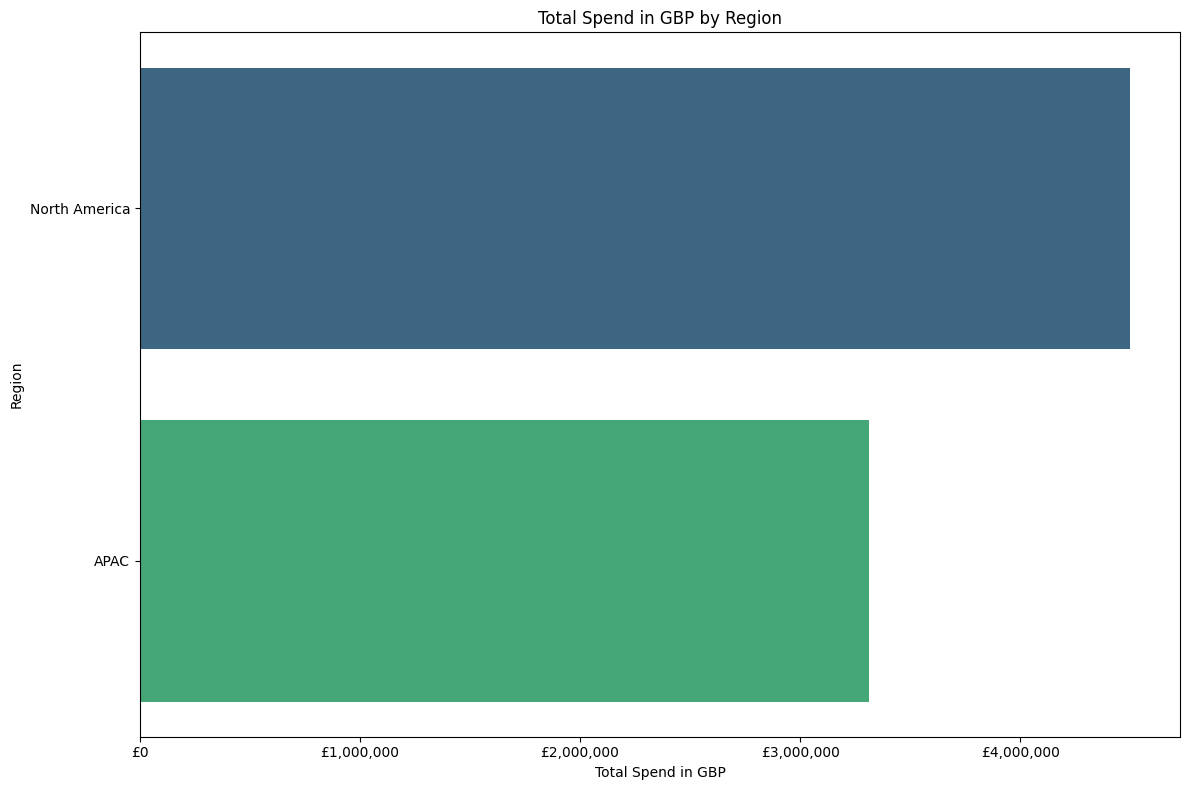

In [14]:
# Group by 'Region' and sum the 'Spend GBP' values
region_spend = df.groupby('Region')['Spend GBP'].sum().reset_index()

# Sort the regions by spend in descending order
region_spend = region_spend.sort_values(by='Spend GBP', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the barplot using seaborn
sns.barplot(x='Spend GBP', y='Region', data=region_spend, palette='viridis')

# Add labels and title
plt.xlabel('Total Spend in GBP')
plt.ylabel('Region')
plt.title('Total Spend in GBP by Region')

# Format the x-axis labels to show in GBP
formatter = plt.FuncFormatter(lambda x, _: f'£{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_49486/1312319375.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spend GBP', y='Location', data=location_spend, palette='viridis')


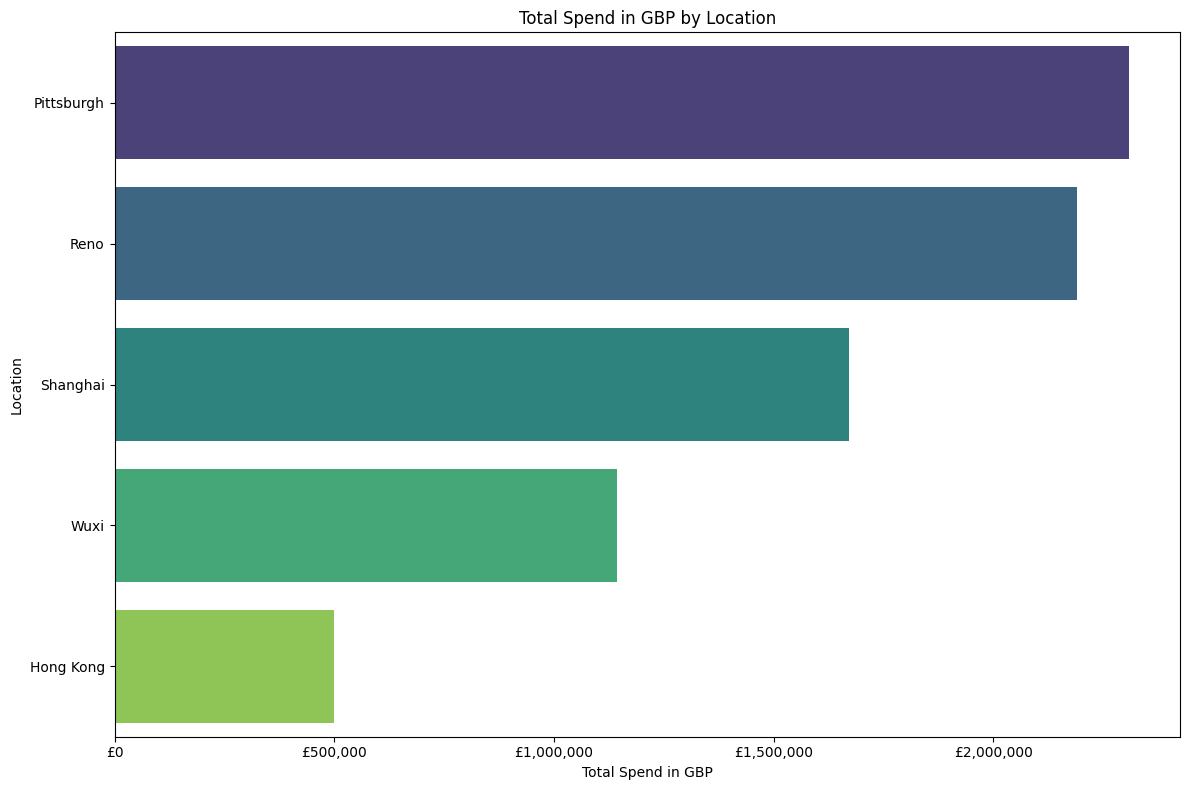

In [15]:
# Group by 'Location' and sum the 'Spend GBP' values
location_spend = df.groupby('Location')['Spend GBP'].sum().reset_index()

# Sort the locations by spend in descending order
location_spend = location_spend.sort_values(by='Spend GBP', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the barplot using seaborn
sns.barplot(x='Spend GBP', y='Location', data=location_spend, palette='viridis')

# Add labels and title
plt.xlabel('Total Spend in GBP')
plt.ylabel('Location')
plt.title('Total Spend in GBP by Location')

# Format the x-axis labels to show in GBP
formatter = plt.FuncFormatter(lambda x, _: f'£{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_49486/3801387505.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year-Month', y='Spend GBP', data=monthly_spend, palette='viridis')


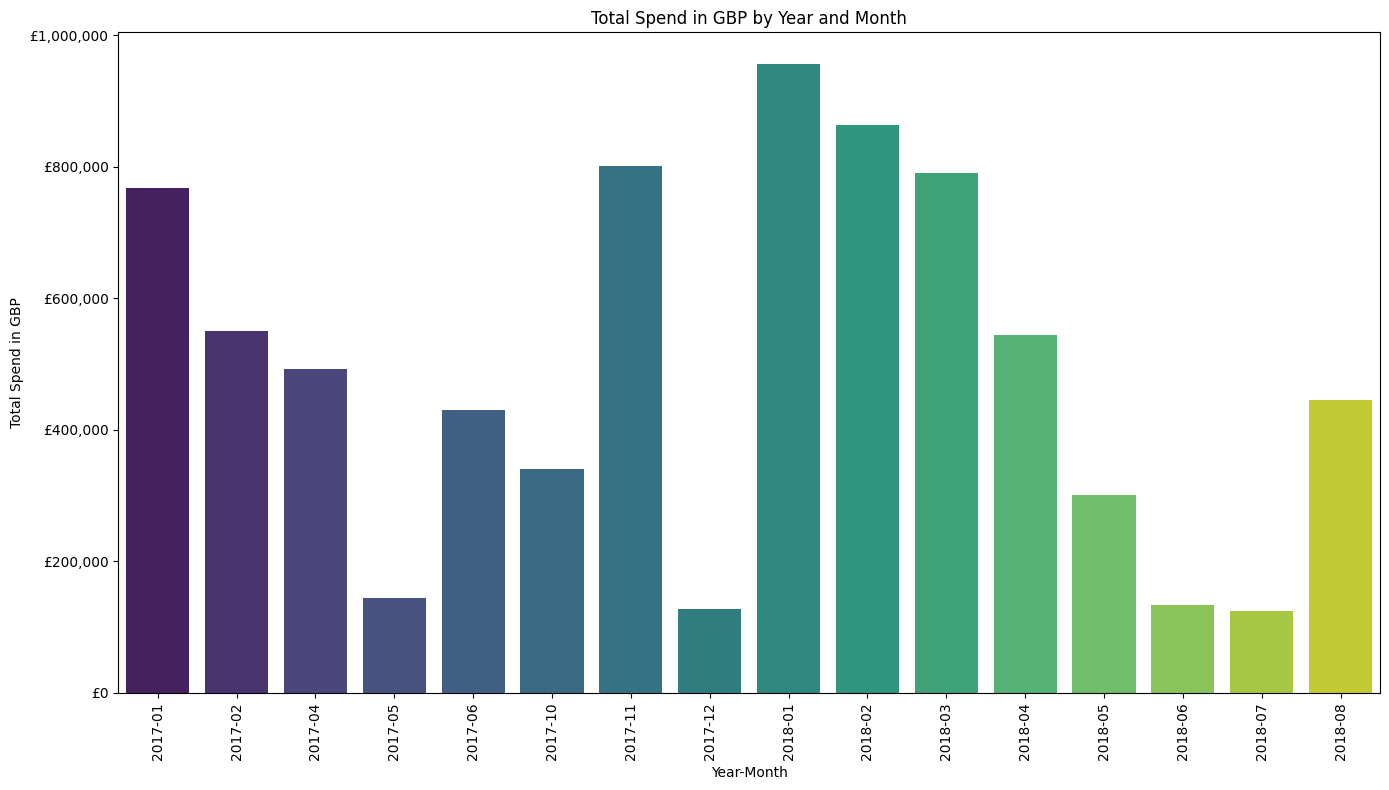

In [16]:
# Parse the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract Year and Month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create a 'Year-Month' column for better visualization
df['Year-Month'] = df['Date'].dt.to_period('M')

# Group by 'Year-Month' and sum the 'Spend GBP' values
monthly_spend = df.groupby('Year-Month')['Spend GBP'].sum().reset_index()

# Convert 'Year-Month' to a string for plotting
monthly_spend['Year-Month'] = monthly_spend['Year-Month'].astype(str)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the barplot using seaborn
sns.barplot(x='Year-Month', y='Spend GBP', data=monthly_spend, palette='viridis')

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Total Spend in GBP')
plt.title('Total Spend in GBP by Year and Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Format the y-axis labels to show in GBP
formatter = plt.FuncFormatter(lambda x, _: f'£{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.tight_layout()
plt.show()

In [17]:
!pip install plotly dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 25.7 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.9 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 9.8 MB/s eta 0:00:00


In [18]:
import pandas as pd
import os
import plotly.graph_objects as go
import plotly.express as px
from dash import Dash, dcc, html

# Get the current working directory
cwd = os.getcwd()

# Define the relative path to the Excel file
file_path = os.path.join(cwd, 'cleaned_data.xlsx')

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Parse the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Year-Month'] = df['Date'].dt.to_period('M')

# Group by 'Year-Month' and sum the 'Spend GBP' values
monthly_spend = df.groupby('Year-Month')['Spend GBP'].sum().reset_index()
monthly_spend['Year-Month'] = monthly_spend['Year-Month'].astype(str)

# Group by 'Region' and sum the 'Spend GBP' values
region_spend = df.groupby('Region')['Spend GBP'].sum().reset_index()

# Group by 'Location' and sum the 'Spend GBP' values
location_spend = df.groupby('Location')['Spend GBP'].sum().reset_index()

# Create figures
fig_spend_by_month = px.bar(monthly_spend, x='Year-Month', y='Spend GBP', title='Total Spend in GBP by Year and Month')
fig_spend_by_region = px.bar(region_spend, x='Spend GBP', y='Region', title='Total Spend in GBP by Region', orientation='h')
fig_spend_by_location = px.bar(location_spend, x='Spend GBP', y='Location', title='Total Spend in GBP by Location', orientation='h')

# Initialize Dash app
app = Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Spend Analysis Dashboard"),
    dcc.Graph(figure=fig_spend_by_month),
    dcc.Graph(figure=fig_spend_by_region),
    dcc.Graph(figure=fig_spend_by_location)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
